In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A =[[4, 0, 0, -2, 1],
    [0,7, 1, 3, 0],
    [0, 0, 5, 1, 1],
    [1, 0, 0 ,8, 1],
    [2, 1, 0, 4, 20]]



In [3]:
A = np.array(A)
A.shape

(5, 5)

In [4]:
epsilon = 10**(-7)

In [5]:
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0
converged = False
x_old = np.array([x1, x2, x3, x4, x5])
for k in range(1, 50):
  x1 = (1+2*x4-x5)/4
  x2 = (0-x3-3*x4)/7
  x3 = (1-x4-x5)/5
  x4 = (0-x1-x5)/8
  x5 = (1 -2*x1-x2-4*x4)/20
  x = np.array([x1, x2, x3, x4, x5])
  # check if it is smaller than threshold
  dx = np.sqrt(np.dot(x-x_old, x-x_old)) #L2 norm
  if dx < epsilon:
    converged = True
    print("Converged!")
    break
  # assign the latest x value to the old value
  x_old = x

print( "number of iterations is", k)
if not converged:
  print("Not converged, increase the # of iterations")

Converged!
number of iterations is 7


In [6]:
x

array([ 0.2250835 , -0.01458956,  0.19955177, -0.03247495,  0.03471612])

In [7]:
b = np.array([1,0,1,0,1])
b

array([1, 0, 1, 0, 1])

In [8]:
%%timeit
np.linalg.solve(A, b)

3.73 μs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
np.linalg.cholesky(A)

array([[2.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.64575131, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.23606798, 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 2.78388218, 0.        ],
       [1.        , 0.37796447, 0.        , 1.25723711, 4.15650066]])

In [10]:
L = np.array([[9, 6, 12],
              [6, 13, 11],
              [12, 11, 26]])
L

array([[ 9,  6, 12],
       [ 6, 13, 11],
       [12, 11, 26]])

In [11]:
np.linalg.cholesky(L)

array([[3., 0., 0.],
       [2., 3., 0.],
       [4., 1., 3.]])

In [12]:
b = np.array([[17.4], [23.6], [30.8]])
b

array([[17.4],
       [23.6],
       [30.8]])

In [13]:
y = np.linalg.inv(np.linalg.cholesky(L)) @ b
y

array([[5.8],
       [4. ],
       [1.2]])

In [14]:
x = np.linalg.inv(np.transpose(np.linalg.cholesky(L))) @ y
x

array([[0.6],
       [1.2],
       [0.4]])

In [15]:
x = np.array([0, 2, 3, 5])
y = np.array([2, 0, -2, -3])
print(x, '\n', y)

[0 2 3 5] 
 [ 2  0 -2 -3]


In [16]:
Vtemp = np.vander(x)
Vtemp

array([[  0,   0,   0,   1],
       [  8,   4,   2,   1],
       [ 27,   9,   3,   1],
       [125,  25,   5,   1]])

In [17]:
len(Vtemp)

4

In [18]:
N = 2
V = Vtemp[:, (len(Vtemp) - N):len(Vtemp)]
V

array([[0, 1],
       [2, 1],
       [3, 1],
       [5, 1]])

In [19]:
Q, R = np.linalg.qr(V)
print('Q =\n', Q)
print('R =\n', R)

Q =
 [[ 0.         -0.85485041]
 [-0.32444284 -0.40492914]
 [-0.48666426 -0.17996851]
 [-0.81110711  0.26995276]]
R =
 [[-6.164414   -1.62221421]
 [ 0.         -1.1697953 ]]


In [20]:
p = np.dot(Q.T, y)
C = np.dot(np.linalg.inv(R), p)
C

array([-1.03846154,  1.84615385])

In [21]:
func = lambda x:C[0]*x + C[1]

In [22]:
f2 = lambda x: 92/35 + -43/35 * x

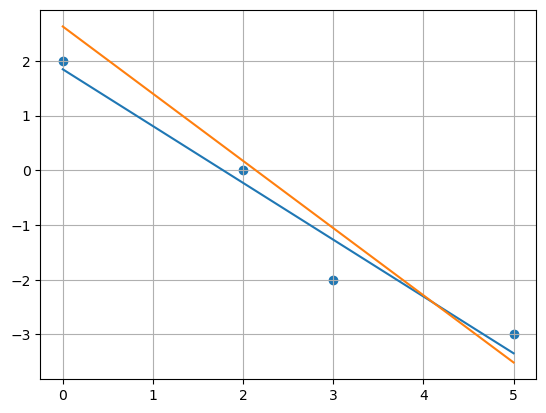

In [23]:
plt.scatter(x,y)
t = np.arange(0, 5, 0.001)
plt.plot(t, func(t))
plt.plot(t, f2(t))
plt.grid()

In [24]:
92/35

2.6285714285714286

In [25]:
-43/35

-1.2285714285714286